In [1]:
import numpy as np
import pandas as pd
import os
# to make this notebook's output identical at every run
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [2]:
df = pd.read_csv('full_data_RemoveNAN_transformSkew_sndAgg.csv')

In [3]:
df.head()

,zip,college_cnt_snd_agg,walmart_cnt_snd_agg,Num_Mcdonalds_snd_agg,Num_Starbucks_snd_agg,Num_Teavana_snd_agg,population_total_snd_agg,pop_under19_snd_agg,pop_19To34_snd_agg,pop_35To54_snd_agg,...,income_median_snd_agg,shopping_mall_cnt_snd_agg,pop_density_snd_agg,selfstorage_count_snd_agg,selfstorage_area_snd_agg,costco_count_snd_agg,LABEL_bubbleStore_cnt_snd_agg,city_encoded,county_name_encoded,state_id_encoded
0,601,0.001463,0.001876,0.002166,0.002062,0.000000,0.005344,0.005004,0.004936,0.005170,...,0.005851,0.001178,0.004728,0.002069,0.001974,0.002117,0.001191,0.000036,0.000034,0.007089
1,602,0.003503,0.001538,0.000441,0.000806,0.000000,0.005625,0.005165,0.005379,0.005438,...,0.005853,0.001077,0.004864,0.000740,0.001017,0.000000,0.000453,0.000046,0.000039,0.007089
2,603,0.002983,0.001654,0.002997,0.002091,0.001270,0.005551,0.005325,0.005296,0.005428,...,0.006060,0.001326,0.004856,0.001317,0.001106,0.001232,0.004917,0.000047,0.000044,0.007089
3,606,0.001347,0.001071,0.001379,0.000717,0.000612,0.005195,0.004837,0.004806,0.004973,...,0.005813,0.001029,0.004907,0.000755,0.000737,0.000053,0.000557,0.005091,0.005202,0.007089
4,610,0.000387,0.000638,0.000957,0.000563,0.000000,0.004722,0.004221,0.004554,0.004609,...,0.005378,0.001129,0.004308,0.000107,0.000113,0.000314,0.000525,0.000184,0.000448,0.007089


In [4]:
df.columns

Index(['zip', 'college_cnt_snd_agg', 'walmart_cnt_snd_agg',
       'Num_Mcdonalds_snd_agg', 'Num_Starbucks_snd_agg', 'Num_Teavana_snd_agg',
       'population_total_snd_agg', 'pop_under19_snd_agg', 'pop_19To34_snd_agg',
       'pop_35To54_snd_agg', 'pop_55AndOver_snd_agg', 'pop_male_snd_agg',
       'pop_female_snd_agg', 'pop_white_snd_agg', 'pop_black_snd_agg',
       'pop_asian_snd_agg', 'pop_latino_snd_agg',
       'pop_inMarriedCoupleFamily_snd_agg', 'pop_foreignBorn_snd_agg',
       'pop_bachelorDegreeOrHigher_snd_agg', 'pop_employed_snd_agg',
       'pop_notInLaborForce_snd_agg', 'pop_household_snd_agg',
       'pop_householdIncome_under50K_snd_agg',
       'pop_householdIncome_50Kto100K_snd_agg',
       'pop_householdIncome_over100K_snd_agg',
       'pop_belowPovertyThreshold_snd_agg', 'income_median_snd_agg',
       'shopping_mall_cnt_snd_agg', 'pop_density_snd_agg',
       'selfstorage_count_snd_agg', 'selfstorage_area_snd_agg',
       'costco_count_snd_agg', 'LABEL_bubbleStor

In [5]:
order= ['LABEL_bubbleStore_cnt_snd_agg', 'zip', 'college_cnt_snd_agg', 'walmart_cnt_snd_agg',
       'Num_Mcdonalds_snd_agg', 'Num_Starbucks_snd_agg', 'Num_Teavana_snd_agg',
       'population_total_snd_agg', 'pop_under19_snd_agg', 'pop_19To34_snd_agg',
       'pop_35To54_snd_agg', 'pop_55AndOver_snd_agg', 'pop_male_snd_agg',
       'pop_female_snd_agg', 'pop_white_snd_agg', 'pop_black_snd_agg',
       'pop_asian_snd_agg', 'pop_latino_snd_agg',
       'pop_inMarriedCoupleFamily_snd_agg', 'pop_foreignBorn_snd_agg',
       'pop_bachelorDegreeOrHigher_snd_agg', 'pop_employed_snd_agg',
       'pop_notInLaborForce_snd_agg', 'pop_household_snd_agg',
       'pop_householdIncome_under50K_snd_agg',
       'pop_householdIncome_50Kto100K_snd_agg',
       'pop_householdIncome_over100K_snd_agg',
       'pop_belowPovertyThreshold_snd_agg', 'income_median_snd_agg',
       'shopping_mall_cnt_snd_agg', 'pop_density_snd_agg',
       'selfstorage_count_snd_agg', 'selfstorage_area_snd_agg',
       'costco_count_snd_agg','city_encoded',
       'county_name_encoded', 'state_id_encoded']
df=df[order]

In [6]:
df.head()

,LABEL_bubbleStore_cnt_snd_agg,zip,college_cnt_snd_agg,walmart_cnt_snd_agg,Num_Mcdonalds_snd_agg,Num_Starbucks_snd_agg,Num_Teavana_snd_agg,population_total_snd_agg,pop_under19_snd_agg,pop_19To34_snd_agg,...,pop_belowPovertyThreshold_snd_agg,income_median_snd_agg,shopping_mall_cnt_snd_agg,pop_density_snd_agg,selfstorage_count_snd_agg,selfstorage_area_snd_agg,costco_count_snd_agg,city_encoded,county_name_encoded,state_id_encoded
0,0.001191,601,0.001463,0.001876,0.002166,0.002062,0.000000,0.005344,0.005004,0.004936,...,0.002697,0.005851,0.001178,0.004728,0.002069,0.001974,0.002117,0.000036,0.000034,0.007089
1,0.000453,602,0.003503,0.001538,0.000441,0.000806,0.000000,0.005625,0.005165,0.005379,...,0.002998,0.005853,0.001077,0.004864,0.000740,0.001017,0.000000,0.000046,0.000039,0.007089
2,0.004917,603,0.002983,0.001654,0.002997,0.002091,0.001270,0.005551,0.005325,0.005296,...,0.003338,0.006060,0.001326,0.004856,0.001317,0.001106,0.001232,0.000047,0.000044,0.007089
3,0.000557,606,0.001347,0.001071,0.001379,0.000717,0.000612,0.005195,0.004837,0.004806,...,0.002160,0.005813,0.001029,0.004907,0.000755,0.000737,0.000053,0.005091,0.005202,0.007089
4,0.000525,610,0.000387,0.000638,0.000957,0.000563,0.000000,0.004722,0.004221,0.004554,...,0.003542,0.005378,0.001129,0.004308,0.000107,0.000113,0.000314,0.000184,0.000448,0.007089


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
from sklearn.preprocessing import  OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [8]:
X = df.drop(['LABEL_bubbleStore_cnt_snd_agg', 'zip','city_encoded',
       'county_name_encoded', 'state_id_encoded'],axis=1).values
Y = df['LABEL_bubbleStore_cnt_snd_agg'].values
Names = df.drop(['LABEL_bubbleStore_cnt_snd_agg', 'zip','city_encoded',
       'county_name_encoded', 'state_id_encoded'], axis=1).columns
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Linear Regression Model

In [9]:
reg = LinearRegression()
steps = [('Linear_Regression_regression',reg)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, Y_train)
reg_pred = pipeline.predict(X_test)
pipeline.score(X_test, Y_test)

0.25683228937548674

In [10]:
reg_coef = reg.fit(X,Y).coef_
reg_features = pd.DataFrame(reg_coef, Names, columns=['Coefficient'])


reg_features.sort_values(by=['Coefficient'],ascending=False)

,Coefficient
pop_household_snd_agg,0.855648
pop_inMarriedCoupleFamily_snd_agg,0.547080
pop_notInLaborForce_snd_agg,0.488253
pop_employed_snd_agg,0.360843
pop_bachelorDegreeOrHigher_snd_agg,0.290035
pop_19To34_snd_agg,0.234673
pop_male_snd_agg,0.203197
selfstorage_area_snd_agg,0.172918
pop_density_snd_agg,0.134764
Num_Starbucks_snd_agg,0.117202


<function matplotlib.pyplot.show(close=None, block=None)>

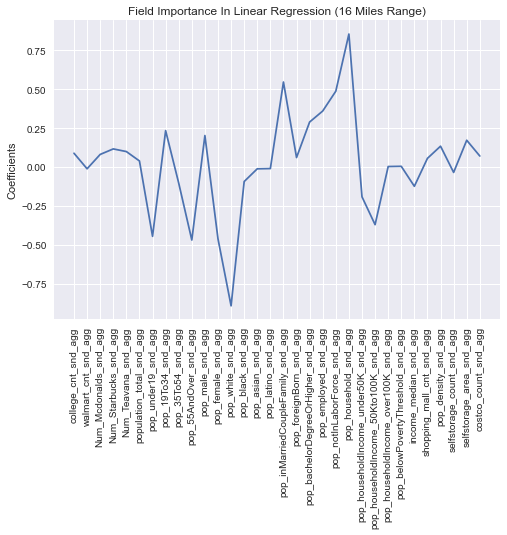

In [11]:
reg_coef = reg.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), reg_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
_ = plt.title('Field Importance In Linear Regression (16 Miles Range)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

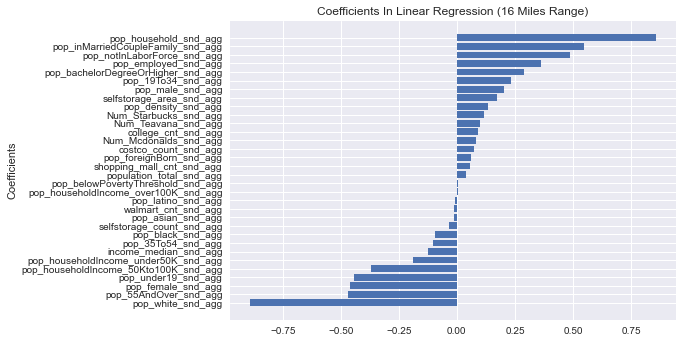

In [12]:
reg_coef = reg.fit(X,Y).coef_
sorted_idx = reg_coef.argsort()
_ = plt.barh(Names[sorted_idx], reg_coef[sorted_idx])
_ = plt.ylabel('Coefficients')
_ = plt.title('Coefficients In Linear Regression (16 Miles Range)')
plt.show

In [13]:
Y_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(Y_train, Y_pred)
mse_train = mean_squared_error(Y_train, Y_pred)
rmse_train = np.sqrt(mse_train)
Y_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(Y_test, Y_pred)
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
cv_results = cross_val_score(pipeline, X, Y, cv=5)

print("R_Squre = ", pipeline.score(X_test, Y_test),"\n"
      "Training_set_mae = ", mae_train,"\n"
      "Training_set_mse = ", mse_train,"\n"
    "Training_set_rmse = ", rmse_train,"\n"
      "Test_set_mae = ", mae_test,"\n"
       "Test_set_mse = ", mse_test,"\n"
      "Test_set_rmse =",rmse_test,"\n"
      "Cross_validation_result:",cv_results,"\n"
      "Cross_validation_result(mean):",cv_results.mean(),"\n"
      "Cross_validation_result(std):",cv_results.std())

R_Squre =  0.26523068405487593 
Training_set_mae =  0.0009304275393487332 
Training_set_mse =  4.874701653874351e-06 
Training_set_rmse =  0.0022078726534549837 
Test_set_mae =  0.0009730418715485611 
Test_set_mse =  5.511656593263978e-06 
Test_set_rmse = 0.00234769175857138 
Cross_validation_result: [0.18824668 0.14864289 0.14996083 0.25645183 0.24334088] 
Cross_validation_result(mean): 0.197328622800918 
Cross_validation_result(std): 0.04540742785635176


Lasso Regression Model

In [14]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.001)
steps = [('Lasso_regression',lasso)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, Y_train)
lasso_pred = pipeline.predict(X_test)
pipeline.score(X_test, Y_test)

-0.0006048677868581986

In [15]:
lasso_coef = lasso.fit(X,Y).coef_
lasso_features = pd.DataFrame(lasso_coef, Names, columns=['Coefficient'])


lasso_features.sort_values(by=['Coefficient'],ascending=False)

,Coefficient
college_cnt_snd_agg,0.0
walmart_cnt_snd_agg,0.0
selfstorage_area_snd_agg,0.0
selfstorage_count_snd_agg,0.0
pop_density_snd_agg,0.0
shopping_mall_cnt_snd_agg,0.0
income_median_snd_agg,0.0
pop_belowPovertyThreshold_snd_agg,0.0
pop_householdIncome_over100K_snd_agg,0.0
pop_householdIncome_50Kto100K_snd_agg,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

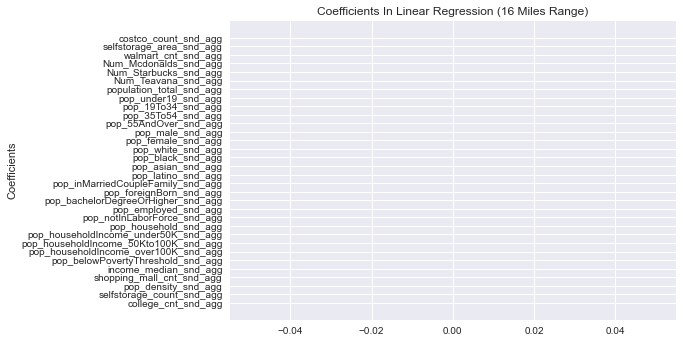

In [16]:
lasso_coef = lasso.fit(X,Y).coef_
sorted_idx = lasso_coef.argsort()
_ = plt.barh(Names[sorted_idx], lasso_coef[sorted_idx])
_ = plt.ylabel('Coefficients')
_ = plt.title('Coefficients In Linear Regression (16 Miles Range)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

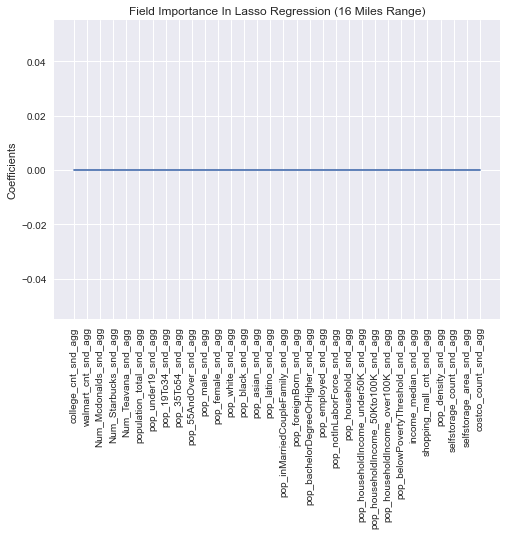

In [17]:
lasso_coef = lasso.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), lasso_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
_ = plt.title('Field Importance In Lasso Regression (16 Miles Range)')
plt.show

In [18]:
Y_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(Y_train, Y_pred)
mse_train = mean_squared_error(Y_train, Y_pred)
rmse_train = np.sqrt(mse_train)
Y_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(Y_test, Y_pred)
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
cv_results = cross_val_score(pipeline, X, Y, cv=5)

print("R_Squre = ", pipeline.score(X_test, Y_test),"\n"
      "Training_set_mae = ", mae_train,"\n"
      "Training_set_mse = ", mse_train,"\n"
    "Training_set_rmse = ", rmse_train,"\n"
      "Test_set_mae = ", mae_test,"\n"
       "Test_set_mse = ", mse_test,"\n"
      "Test_set_rmse =",rmse_test,"\n"
      "Cross_validation_result:",cv_results,"\n"
      "Cross_validation_result(mean):",cv_results.mean(),"\n"
      "Cross_validation_result(std):",cv_results.std())

R_Squre =  -0.0002963624840666146 
Training_set_mae =  0.0011536699942772605 
Training_set_mse =  6.540526315422467e-06 
Training_set_rmse =  0.0025574452712467705 
Test_set_mae =  0.001194410855936989 
Test_set_mse =  7.503429881814822e-06 
Test_set_rmse = 0.0027392389238280806 
Cross_validation_result: [-0.0001103  -0.00370634 -0.04236758 -0.01654958 -0.02530103] 
Cross_validation_result(mean): -0.017606965491366377 
Cross_validation_result(std): 0.015315125933628078


Ridge Regression Model

In [19]:
from sklearn.linear_model import Ridge
rng=Ridge(alpha=0.001)
steps = [('Ridge_regression',rng)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, Y_train)
rng_pred = pipeline.predict(X_test)
pipeline.score(X_test, Y_test)

0.2528239399144123

In [20]:
rng_coef = rng.fit(X,Y).coef_
rng_features = pd.DataFrame(rng_coef, Names, columns=['Coefficient'])


rng_features.sort_values(by=['Coefficient'],ascending=False)

,Coefficient
pop_notInLaborForce_snd_agg,0.311946
pop_inMarriedCoupleFamily_snd_agg,0.264127
pop_bachelorDegreeOrHigher_snd_agg,0.234132
pop_household_snd_agg,0.215676
pop_19To34_snd_agg,0.215269
selfstorage_area_snd_agg,0.169047
pop_density_snd_agg,0.149824
Num_Starbucks_snd_agg,0.120705
pop_employed_snd_agg,0.102722
Num_Teavana_snd_agg,0.100860


<function matplotlib.pyplot.show(close=None, block=None)>

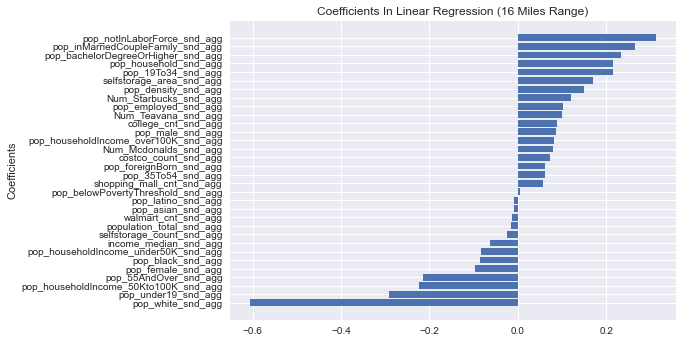

In [21]:
rng_coef = rng.fit(X,Y).coef_
sorted_idx = rng_coef.argsort()
_ = plt.barh(Names[sorted_idx], rng_coef[sorted_idx])
_ = plt.ylabel('Coefficients')
_ = plt.title('Coefficients In Linear Regression (16 Miles Range)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

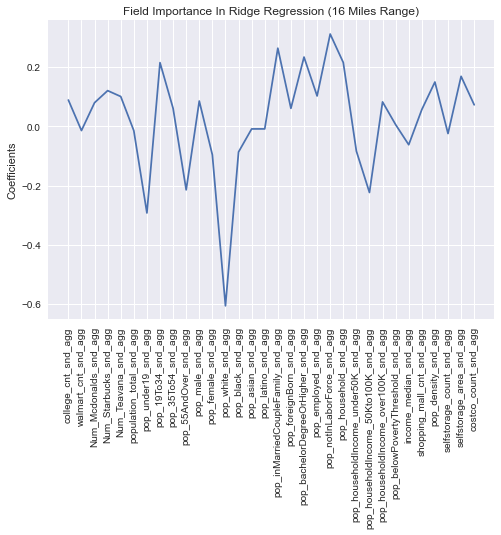

In [22]:
rng_coef = rng.fit(X,Y).coef_
_ = plt.plot(range(len(Names)), rng_coef)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Coefficients')
_ = plt.title('Field Importance In Ridge Regression (16 Miles Range)')
plt.show

In [23]:
Y_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(Y_train, Y_pred)
mse_train = mean_squared_error(Y_train, Y_pred)
rmse_train = np.sqrt(mse_train)
Y_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(Y_test, Y_pred)
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
cv_results = cross_val_score(pipeline, X, Y, cv=5)

print("R_Squre = ", pipeline.score(X_test, Y_test),"\n"
      "Training_set_mae = ", mae_train,"\n"
      "Training_set_mse = ", mse_train,"\n"
    "Training_set_rmse = ", rmse_train,"\n"
      "Test_set_mae = ", mae_test,"\n"
       "Test_set_mse = ", mse_test,"\n"
      "Test_set_rmse =",rmse_test,"\n"
      "Cross_validation_result:",cv_results,"\n"
      "Cross_validation_result(mean):",cv_results.mean(),"\n"
      "Cross_validation_result(std):",cv_results.std())

R_Squre =  0.2622244502082115 
Training_set_mae =  0.0009172952313863628 
Training_set_mse =  4.892967438247555e-06 
Training_set_rmse =  0.0022120052979700466 
Test_set_mae =  0.000957894230979685 
Test_set_mse =  5.534206975053599e-06 
Test_set_rmse = 0.002352489527086911 
Cross_validation_result: [0.19175952 0.1622469  0.14897249 0.26222528 0.23873039] 
Cross_validation_result(mean): 0.2007869160381485 
Cross_validation_result(std): 0.043510784204744364


Random Forest Regression Model

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, max_features='auto', min_samples_leaf = 4, min_samples_split=2, n_estimators=80,max_depth = 20 )
steps = [('Random_Forest_Regressor',rfr)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, Y_train)
rfr_pred = pipeline.predict(X_test)
pipeline.score(X_test, Y_test)

Tree_features = pd.DataFrame(rfr.feature_importances_, Names, columns=['Importance'])


Tree_features.sort_values(by=['Importance'],ascending=False)

,Importance
pop_asian_snd_agg,0.243688
selfstorage_area_snd_agg,0.072730
Num_Starbucks_snd_agg,0.051734
pop_belowPovertyThreshold_snd_agg,0.047164
pop_bachelorDegreeOrHigher_snd_agg,0.044401
pop_foreignBorn_snd_agg,0.044152
Num_Mcdonalds_snd_agg,0.042208
pop_density_snd_agg,0.041724
college_cnt_snd_agg,0.041109
shopping_mall_cnt_snd_agg,0.036377


Text(0.5, 1.0, 'Field Importance In Random Forest Regression (16 Miles Range)')

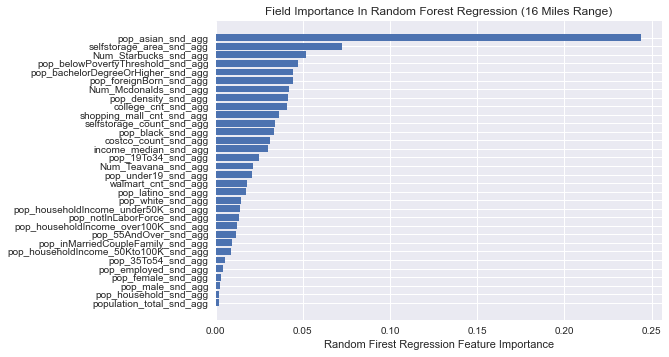

In [25]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(Names[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Firest Regression Feature Importance")
plt.title('Field Importance In Random Forest Regression (16 Miles Range)')

<function matplotlib.pyplot.show(close=None, block=None)>

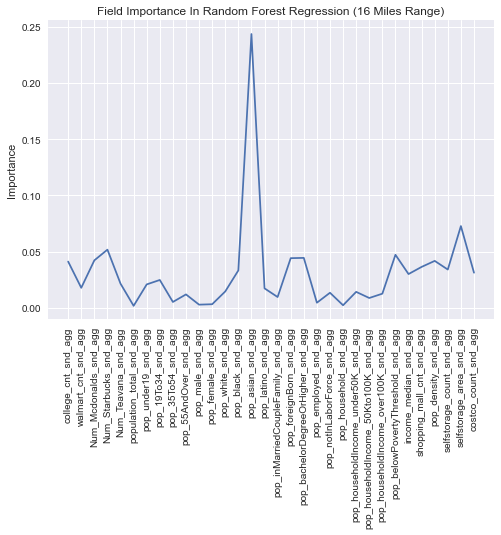

In [26]:
_ = plt.plot(range(len(Names)), Tree_features)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Importance')
_ = plt.title('Field Importance In Random Forest Regression (16 Miles Range)')
plt.show

In [23]:
Y_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(Y_train, Y_pred)
mse_train = mean_squared_error(Y_train, Y_pred)
rmse_train = np.sqrt(mse_train)
Y_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(Y_test, Y_pred)
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
cv_results = cross_val_score(pipeline, X, Y, cv=5)

print("R_Squre = ", pipeline.score(X_test, Y_test),"\n"
      "Training_set_mae = ", mae_train,"\n"
      "Training_set_mse = ", mse_train,"\n"
    "Training_set_rmse = ", rmse_train,"\n"
      "Test_set_mae = ", mae_test,"\n"
       "Test_set_mse = ", mse_test,"\n"
      "Test_set_rmse =",rmse_test,"\n"
      "Cross_validation_result:",cv_results,"\n"
      "Cross_validation_result(mean):",cv_results.mean(),"\n"
      "Cross_validation_result(std):",cv_results.std())

R_Squre =  0.3895461554412808 
Training_set_mae =  0.00046189230599550957 
Training_set_mse =  1.8927797529201475e-06 
Training_set_rmse =  0.0013757833233907684 
Test_set_mae =  0.0008034621673365354 
Test_set_mse =  4.579140533267305e-06 
Test_set_rmse = 0.0021398926452668846 
Cross_validation_result: [0.26269518 0.27782611 0.31049423 0.41129078 0.35179643] 
Cross_validation_result(mean): 0.3228205455112597 
Cross_validation_result(std): 0.05377375134072581


In [24]:
predict_df = pd.read_csv('recommend_data_sndAgg_labelNotNorm.csv')

In [25]:
predict_df.head()

,zip,college_cnt_snd_agg,walmart_cnt_snd_agg,Num_Mcdonalds_snd_agg,Num_Starbucks_snd_agg,Num_Teavana_snd_agg,population_total_snd_agg,pop_under19_snd_agg,pop_19To34_snd_agg,pop_35To54_snd_agg,...,pop_householdIncome_50Kto100K_snd_agg,pop_householdIncome_over100K_snd_agg,pop_belowPovertyThreshold_snd_agg,income_median_snd_agg,shopping_mall_cnt_snd_agg,pop_density_snd_agg,selfstorage_count_snd_agg,selfstorage_area_snd_agg,costco_count_snd_agg,LABEL_bubbleStore_cnt_snd_agg
0,623,0.000000,0.004203,0.001947,0.000000,0.0,0.008281,0.008169,0.008293,0.008706,...,0.007983,0.005929,0.003771,0.005295,0.000000,0.007914,0.003070,0.003455,0.0,NaN
1,636,0.001790,0.000331,0.000153,0.000119,0.0,0.005639,0.005308,0.005752,0.005414,...,0.005059,0.003750,0.004378,0.005177,0.000000,0.004182,0.000000,0.000000,0.0,NaN
2,641,0.000000,0.000000,0.000000,0.000000,0.0,0.007747,0.007642,0.007971,0.007973,...,0.006277,0.003681,0.003134,0.005165,0.000000,0.005449,0.000000,0.000000,0.0,NaN
3,656,0.001598,0.000000,0.003102,0.001540,0.0,0.006485,0.006511,0.006390,0.006538,...,0.006124,0.004359,0.003120,0.005276,0.001522,0.005575,0.000000,0.000000,0.0,NaN
4,660,0.000093,0.000000,0.000335,0.000000,0.0,0.004972,0.004603,0.004787,0.004858,...,0.004672,0.004032,0.000952,0.005286,0.000208,0.005040,0.000213,0.000096,0.0,NaN


In [26]:
predict_df.shape

(5417, 34)

In [27]:
x = predict_df.drop(['LABEL_bubbleStore_cnt_snd_agg', 'zip'], axis=1).values
y = predict_df['LABEL_bubbleStore_cnt_snd_agg'].values
Names = predict_df.drop(['LABEL_bubbleStore_cnt_snd_agg', 'zip'], axis=1).columns

In [28]:
Predict=pipeline.predict(x)

In [29]:
Predict

array([5.56266092e-04, 1.29285139e-04, 4.38657099e-04, ...,
       1.38335590e-06, 7.92129786e-06, 1.75840120e-05])

In [30]:
predict_df['LABEL_bubbleStore_cnt_snd_agg'] = Predict
predict_df

,zip,college_cnt_snd_agg,walmart_cnt_snd_agg,Num_Mcdonalds_snd_agg,Num_Starbucks_snd_agg,Num_Teavana_snd_agg,population_total_snd_agg,pop_under19_snd_agg,pop_19To34_snd_agg,pop_35To54_snd_agg,...,pop_householdIncome_50Kto100K_snd_agg,pop_householdIncome_over100K_snd_agg,pop_belowPovertyThreshold_snd_agg,income_median_snd_agg,shopping_mall_cnt_snd_agg,pop_density_snd_agg,selfstorage_count_snd_agg,selfstorage_area_snd_agg,costco_count_snd_agg,LABEL_bubbleStore_cnt_snd_agg
0,623,0.000000,0.004203,0.001947,0.000000,0.0,0.008281,0.008169,0.008293,0.008706,...,0.007983,0.005929,0.003771,0.005295,0.000000,0.007914,0.003070,0.003455,0.0,0.000556
1,636,0.001790,0.000331,0.000153,0.000119,0.0,0.005639,0.005308,0.005752,0.005414,...,0.005059,0.003750,0.004378,0.005177,0.000000,0.004182,0.000000,0.000000,0.0,0.000129
2,641,0.000000,0.000000,0.000000,0.000000,0.0,0.007747,0.007642,0.007971,0.007973,...,0.006277,0.003681,0.003134,0.005165,0.000000,0.005449,0.000000,0.000000,0.0,0.000439
3,656,0.001598,0.000000,0.003102,0.001540,0.0,0.006485,0.006511,0.006390,0.006538,...,0.006124,0.004359,0.003120,0.005276,0.001522,0.005575,0.000000,0.000000,0.0,0.001558
4,660,0.000093,0.000000,0.000335,0.000000,0.0,0.004972,0.004603,0.004787,0.004858,...,0.004672,0.004032,0.000952,0.005286,0.000208,0.005040,0.000213,0.000096,0.0,0.000224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5412,99825,0.001656,0.000000,0.001162,0.000000,0.0,0.003144,0.001800,0.002906,0.002728,...,0.003093,0.002820,0.002763,0.005393,0.000000,0.002935,0.000000,0.000000,0.0,0.000057
5413,99835,0.000000,0.000000,0.004096,0.000000,0.0,0.005176,0.004835,0.004952,0.005212,...,0.005229,0.005070,0.006825,0.005300,0.000000,0.001725,0.000000,0.000000,0.0,0.000070
5414,99923,0.000000,0.000000,0.000000,0.000000,0.0,0.000880,-0.001867,-0.002137,-0.001895,...,-0.001623,-0.002022,0.007819,0.005431,0.000000,-0.000105,0.000000,0.000000,0.0,0.000001
5415,99925,0.000000,0.000000,0.000000,0.000000,0.0,0.003216,0.002906,0.002559,0.003039,...,0.003210,0.002910,0.003748,0.005567,0.000000,0.003065,0.000000,0.000000,0.0,0.000008


In [31]:
predict_df.to_excel("sndAggPrediction.xlsx")

Xgboost model

In [32]:
import xgboost as xgb
xgb2 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.1, learning_rate = 0.1,
                max_depth = 20, alpha = 0.1, n_estimators = 200,verbosity = 0,subsample = 1,min_child_weight=3 )
steps = [('XGboost_Regressor',xgb2)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, Y_train)
xgb_pred = pipeline.predict(X_test)
pipeline.score(X_test, Y_test)

0.3490788521418604

In [33]:
xgb_features = pd.DataFrame(xgb2.feature_importances_, Names, columns=['Importance'])
xgb_features.sort_values(by=['Importance'],ascending=False)

,Importance
Num_Teavana_snd_agg,0.093034
pop_bachelorDegreeOrHigher_snd_agg,0.083737
pop_asian_snd_agg,0.077566
selfstorage_count_snd_agg,0.068467
shopping_mall_cnt_snd_agg,0.046798
Num_Starbucks_snd_agg,0.044382
selfstorage_area_snd_agg,0.044225
college_cnt_snd_agg,0.043024
costco_count_snd_agg,0.042062
pop_density_snd_agg,0.042031


<function matplotlib.pyplot.show(close=None, block=None)>

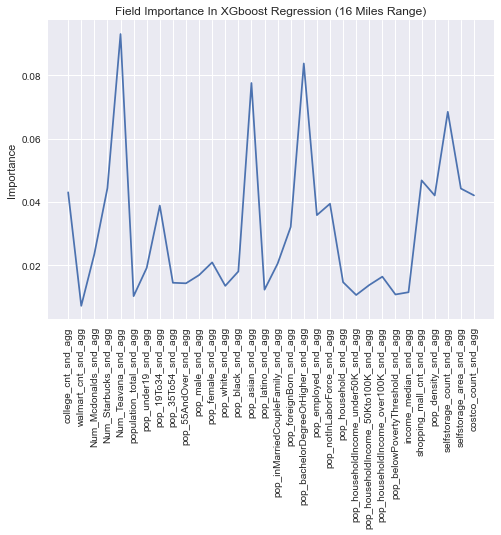

In [34]:
_ = plt.plot(range(len(Names)), xgb_features)
_ = plt.xticks(range(len(Names)), Names, rotation=90)
_ = plt.ylabel('Importance')
_ = plt.title('Field Importance In XGboost Regression (16 Miles Range)')
plt.show

Text(0.5, 1.0, 'Field Importance In XGboost Regression (16 Miles Range)')

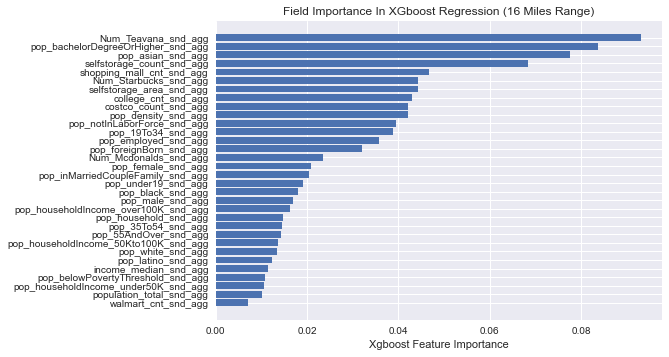

In [35]:
sorted_idx = xgb2.feature_importances_.argsort()
plt.barh(Names[sorted_idx], xgb2.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.title('Field Importance In XGboost Regression (16 Miles Range)')

In [36]:
Y_pred = pipeline.predict(X_train)
mae_train = mean_absolute_error(Y_train, Y_pred)
mse_train = mean_squared_error(Y_train, Y_pred)
rmse_train = np.sqrt(mse_train)
Y_pred = pipeline.predict(X_test)
mae_test = mean_absolute_error(Y_test, Y_pred)
mse_test = mean_squared_error(Y_test, Y_pred)
rmse_test = np.sqrt(mse_test)
cv_results = cross_val_score(pipeline, X, Y, cv=5)

print("R_Squre = ", pipeline.score(X_test, Y_test),"\n"
      "Training_set_mae = ", mae_train,"\n"
      "Training_set_mse = ", mse_train,"\n"
    "Training_set_rmse = ", rmse_train,"\n"
      "Test_set_mae = ", mae_test,"\n"
       "Test_set_mse = ", mse_test,"\n"
      "Test_set_rmse =",rmse_test,"\n"
      "Cross_validation_result:",cv_results,"\n"
      "Cross_validation_result(mean):",cv_results.mean(),"\n"
      "Cross_validation_result(std):",cv_results.std())

R_Squre =  0.3490788521418604 
Training_set_mae =  0.0007521505852475847 
Training_set_mse =  2.9635217344519746e-06 
Training_set_rmse =  0.001721488232446558 
Test_set_mae =  0.0008597028573224059 
Test_set_mse =  4.882694144178462e-06 
Test_set_rmse = 0.002209681910180391 
Cross_validation_result: [0.22333413 0.19261825 0.23861009 0.339838   0.31624229] 
Cross_validation_result(mean): 0.2621285520675477 
Cross_validation_result(std): 0.056314941271307914
